In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd


import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

%matplotlib inline

In [2]:
os.getcwd()

'/scratch/connectome/jubin/ABCD-3DCNN-jub/suicidality/testcodes'

In [2]:
global dataset, exp, dir_path

dataset='ABCD'
exp='age_scratch_13cc31.json'
model='DenseNet3D121'
dir_path = f'/scratch/connectome/jubin/result'

In [3]:
!ls $dir_path

model				   TL_age_UKB_ABCD_13_098db2.json
rn.sh				   TL_age_UKB_ABCD_14_74d9b0.json
SimCLR_TL_ABCD_age_01_dc11a2.json  TL_age_UKB_ABCD_15_c35cf7.json
SimCLR_TL_ABCD_age_02_ad868e.json  TL_age_UKB_ABCD_17_b109ab.json
SimCLR_TL_ABCD_age_22_0c3abb.json  TL_age_UKB_ABCD_18_040ee3.json
SimCLR_TL_ABCD_sex_01_1f711c.json  TL_age_UKB_ABCD_19_916722.json
SimCLR_TL_ABCD_sex_01_873390.json  TL_age_UKB_ABCD_20_6951d9.json
SimCLR_TL_ABCD_sex_02_38740c.json  TL_age_UKB_ABCD_21_98d2d8.json
TL_age_UKB_ABCD_01_212abe.json	   TL_age_UKB_ABCD_22_c0dfc7.json
TL_age_UKB_ABCD_02_81494b.json	   TL_age_UKB_ABCD_23_bd65d7.json
TL_age_UKB_ABCD_03_1af172.json	   TL_age_UKB_ABCD_24_07b86a.json
TL_age_UKB_ABCD_04_de437a.json	   TL_age_UKB_ABCD_25_e3814f.json
TL_age_UKB_ABCD_05_20b656.json	   TL_age_UKB_ABCD_26_3d9356.json
TL_age_UKB_ABCD_06_a1ee31.json	   TL_age_UKB_ABCD_27_a698c2.json
TL_age_UKB_ABCD_07_8fa2d7.json	   TL_age_UKB_ABCD_28_4cb554.json
TL_age_UKB_ABCD_08_4afb7a.json	   TL_age_UKB_ABCD_29_d29f98.jso

In [10]:
jsons = glob.glob(f'{dir_path}/TL_age_UKB_ABCD_*.json')

In [12]:
jsons.sort()

In [14]:
jsons = jsons[:9]

In [15]:
jsons

['/scratch/connectome/jubin/result/TL_age_UKB_ABCD_01_212abe.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_02_81494b.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_03_1af172.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_04_de437a.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_05_20b656.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_06_a1ee31.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_07_8fa2d7.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_08_4afb7a.json',
 '/scratch/connectome/jubin/result/TL_age_UKB_ABCD_09_d57910.json']

In [17]:
import os.path
from datetime import datetime

for file in jsons:
    print(file)
    print(datetime.fromtimestamp(os.path.getctime(file)).strftime('%Y.%m.%d %H:%M:%S'))
#     print("Last modified: %s" % time.ctime(os.path.getmtime(dir_path+'/'+file)))
#     print("Created: %s" % time.ctime(os.path.getctime(dir_path+'/'+file)))
    print()

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_01_212abe.json
2022.05.21 23:54:30

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_02_81494b.json
2022.06.25 18:52:49

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_03_1af172.json
2022.06.25 18:53:06

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_04_de437a.json
2022.06.11 22:40:48

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_05_20b656.json
2022.06.11 22:40:48

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_06_a1ee31.json
2022.06.11 22:40:48

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_07_8fa2d7.json
2022.06.25 18:53:13

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_08_4afb7a.json
2022.06.25 18:53:19

/scratch/connectome/jubin/result/TL_age_UKB_ABCD_09_d57910.json
2022.06.25 18:52:56



In [18]:
## ===== loading json file as pandas data frame ===== ##
def load_exp_result(filename):
    list_result = []
    with open(filename, 'r') as infile:
        results = json.load(infile)
        list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df


## ===== plotting loss and accuracy graph together ===== ## 
def plot_loss_acc(df,**kwargs):
    train_losses = df['train_losses']
    train_losses = list(train_losses[0].values())[0]

    val_losses = df['val_losses']
    val_losses = list(val_losses[0].values())[0]
    
    train_accs = df['train_accs']
    train_accs = list(train_accs[0].values())[0]
    
    val_accs = df['val_accs']
    val_accs = list(val_accs[0].values())[0]
    
    ## === making dataframe for loss === ##
    loss_data = []
    
    for epoch,train_loss in enumerate(train_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})

    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    ## ================================== ##
    
    ## === making dataframe for acc === ##
    acc_data = []
    
    for epoch,train_acc in enumerate(train_accs,0):
        acc_data.append({'type':'train','acc':train_acc,'epoch':epoch})
    
    for epoch,val_acc in enumerate(val_accs,0):
        acc_data.append({'type':'val','acc':val_acc,'epoch':epoch})
        
    df_acc = pd.DataFrame(acc_data)
    ## ================================== ##
    
    ## === plotting == ##
    plt.rcParams["figure.figsize"] = (10,6)
    fig, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(x=df_loss['epoch'], y=df_loss['loss'],hue=df_loss['type'],ax=axes[0])
    sns.lineplot(x=df_acc['epoch'], y=df_acc['acc'],hue=df_acc['type'],ax=axes[1])
    
    model = df['model'][0]
    acc_val = df['val_accs'][0]['age'][-1]
    try:
        acc_test = df['test_acc'][0]['age'][-1]
    except:
        pass
    optim = df['optim'][0]
    
    try:
        title_string = f"Exp name : {df.exp_name[0]}\n\
        Model structure is {model} \n\
        Acc(val/test) is {acc_val:.2f}/{acc_test:.2f} \n\
        Optimizer is {optim}"
    except:
        title_string = f"Exp name : {df.exp_name[0]}\n\
        Model structure is {model} \n\
        Acc(val) is {acc_val:.2f} \n\
        Optimizer is {optim}"
        print("NO TEST RESULT",df.exp_name[0])
    plt.suptitle(title_string,y=1.2)

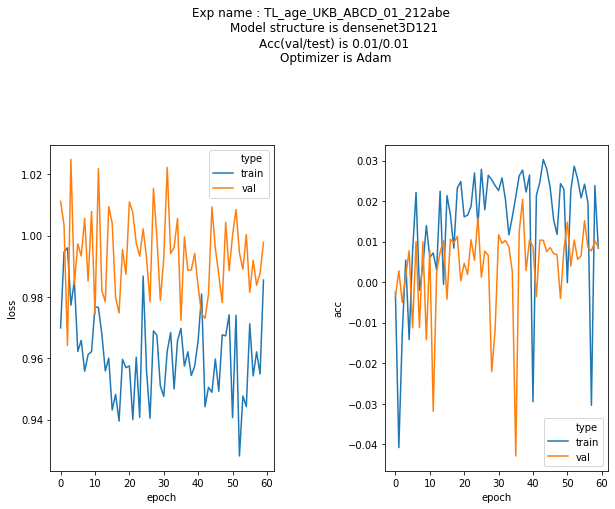

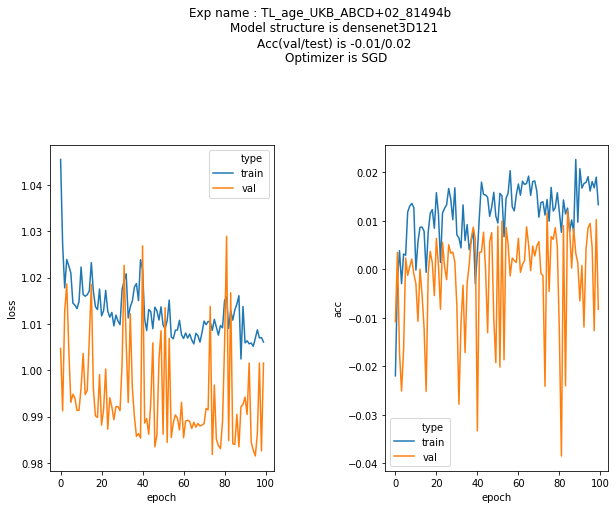

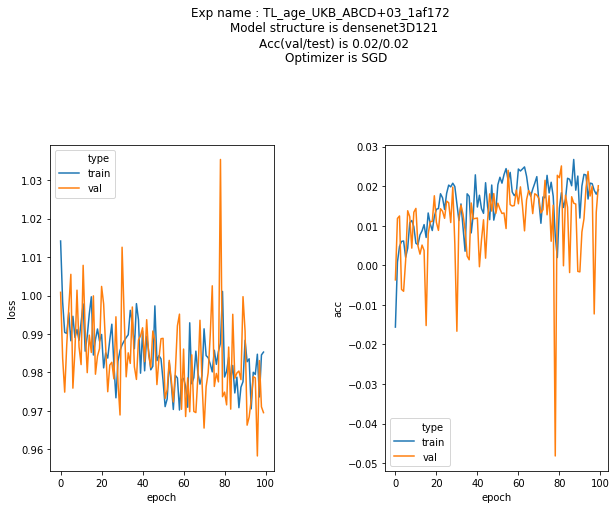

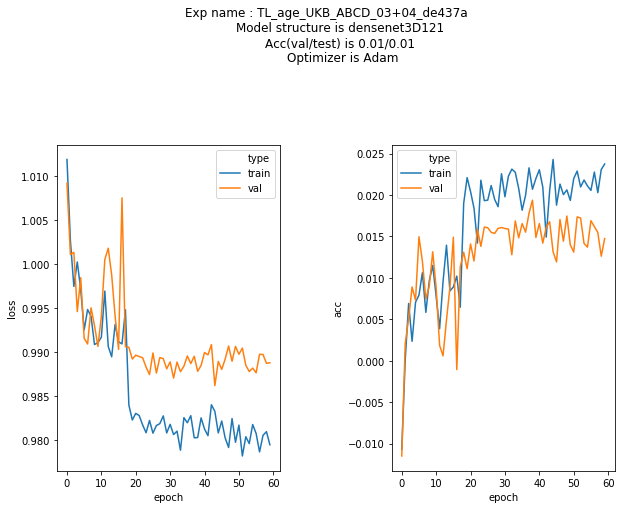

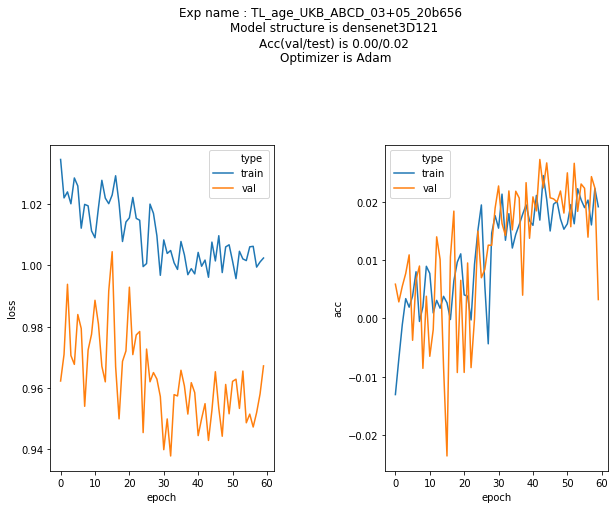

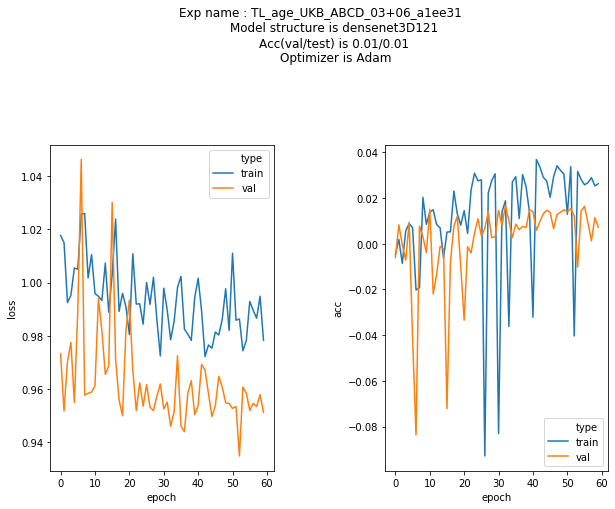

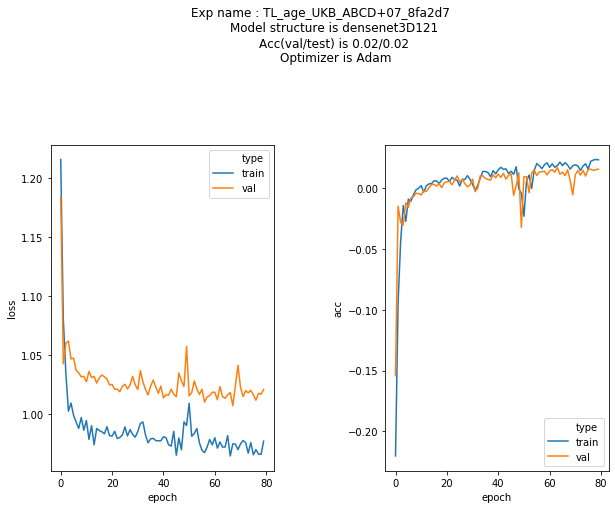

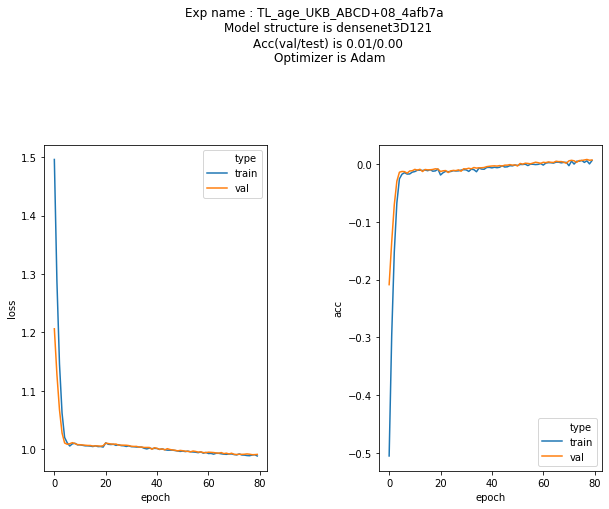

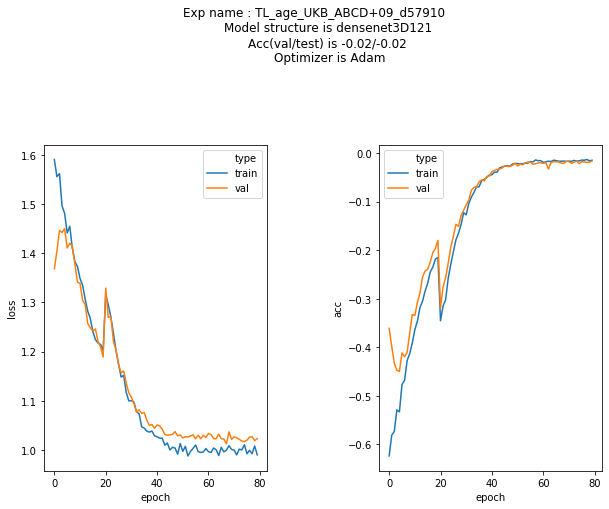

In [21]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
#     file_path = dir_path+'/'+file
#     df = load_exp_result(file_path)
    df = load_exp_result(file)
    dl = plot_loss_acc(df)

In [14]:
df

,train_losses,train_accs,val_losses,val_accs,model,dataset,data,val_size,test_size,resize,...,epoch_FC,exp_name,cat_target,num_target,confusion_matrix,gpus,sbatch,transfer,unfrozen_layer,lr_adjusted
0,"{'age': [1.1848508218924205, 1.089855929215749...","{'age': [-0.18995948168194743, -0.101146426258...","{'age': [1.2356871167818706, 1.020554999510447...","{'age': [-0.21172137156335855, -0.007514949131...",densenet3D121,ABCD,freesurfer,0.25,0.5,"[96, 96, 96]",...,40,TL_age_UKB_ABCD_17_b109ab,[],[age],None,None,True,age,3,0.00001


In [161]:
jsons = ['TL_age_UKB_ABCD_10_a157cd.json']

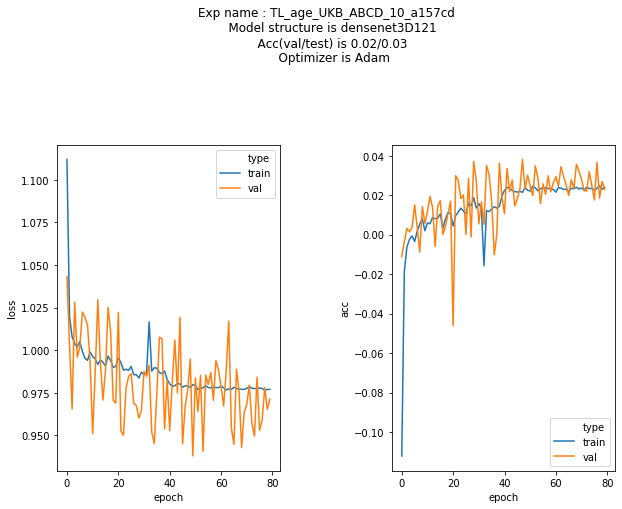

In [162]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
    file_path = dir_path+'/'+file
    df = load_exp_result(file_path)
    dl = plot_loss_acc(df)

In [124]:
df.columns

Index(['train_losses', 'train_accs', 'val_losses', 'val_accs', 'train_acc',
       'val_acc', 'test_acc', 'model', 'val_size', 'test_size', 'resize',
       'train_batch_size', 'val_batch_size', 'in_channels', 'optim', 'lr',
       'weight_decay', 'exp_name', 'cat_target', 'num_target',
       'confusion_matrix', 'gpus', 'sbatch'],
      dtype='object')

In [145]:
print(f"{df['test_acc'][0].}")

{'age': [0.05385145723537843]}
